In [1]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_1 = pickle.load(fo, encoding='bytes')
    return dict_1

In [2]:
file=[]
for i in range(1,6):
    file.append(unpickle('cifar-10-batches-py/data_batch_%d'%i))

In [3]:
file[0].keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
file[0][b'data'].shape

(10000, 3072)

In [5]:
import numpy as np
train_data = file[0][b'data']
train_label = file[0][b'labels']
for i in range(1,5):
    train_data = np.vstack((train_data,file[i][b'data']))
    train_label = np.hstack((train_label,file[i][b'labels']))

In [6]:
print(np.shape(train_data))
print(np.shape(train_label))

(50000, 3072)
(50000,)


In [7]:
import matplotlib.pyplot as plt

In [8]:
train_img = train_data.reshape(-1,3,32,32).transpose(0,2,3,1)

In [9]:
classes = np.zeros((10,10,32,32,3))
classes_list = [[] for i in range(10)]
N = 100 # how many figs to be displayed
counter = [0]*int(N/10)
i = 0
while True:
    if np.sum(counter)==N:
        break
    if counter[train_label[i]]<10:
        classes_list[train_label[i]].append(train_img[i])
        #classes[train_label[i],counter[train_label[i]]] = train_img[i]
        counter[train_label[i]]+=1
        i += 1
    else:
        i += 1
        continue

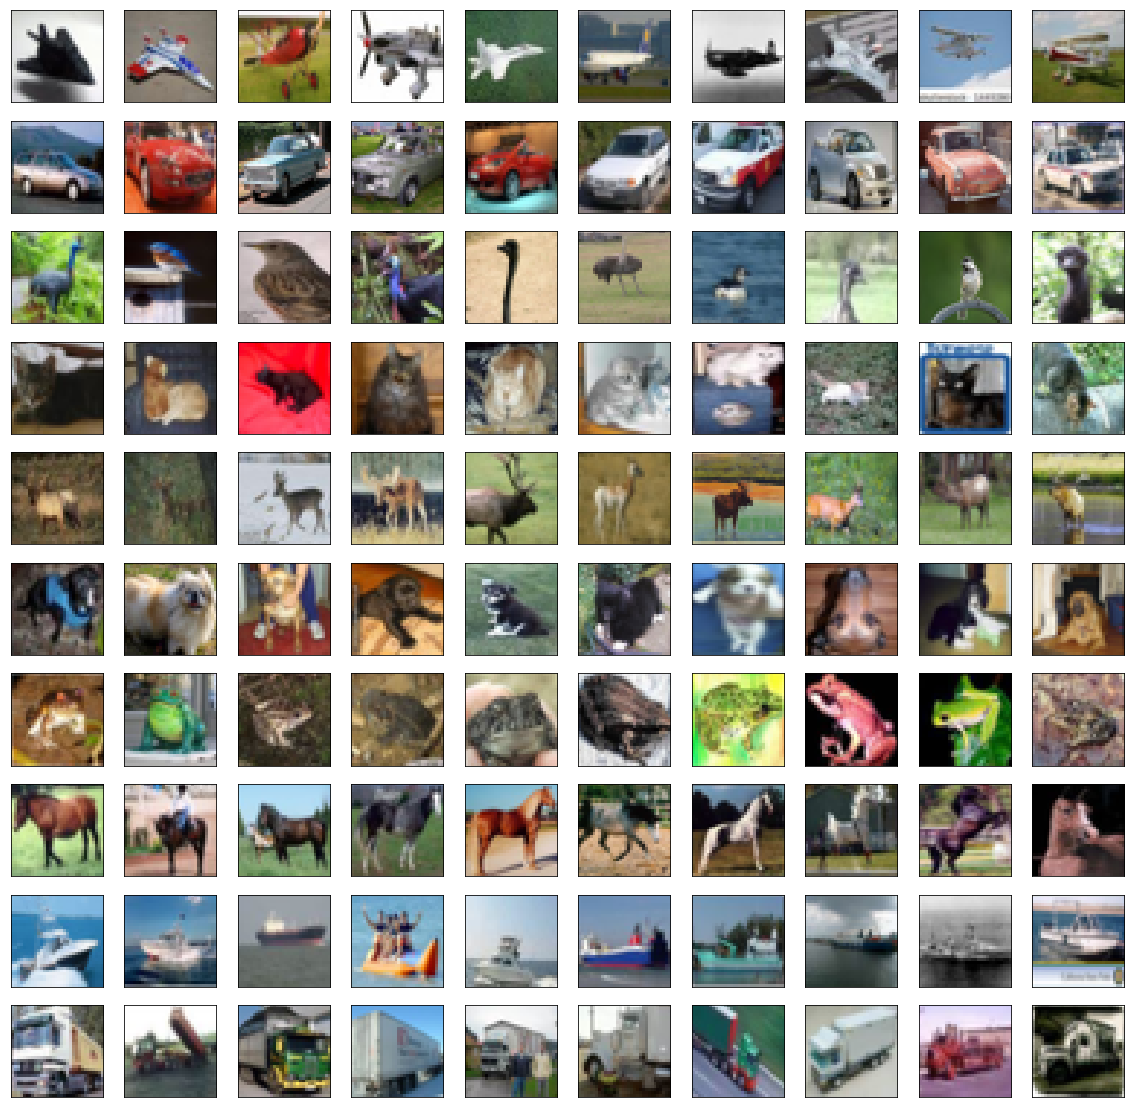

In [10]:
n = 10  # n*n plot
plt.figure(figsize=(20, 20))
for i in range(n):
    #print('class %d'%i)
    for j in range(n):
        ax = plt.subplot(n,n,i*n+j+1)
        plt.imshow(classes_list[i][j])
        #plt.imshow(np.asarray([classes[i,j,:,:,0],classes[i,j,:,:,1],classes[i,j,:,:,2]]).transpose(1,2,0))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
from time import time
import pandas as pd
import numpy as np
from PIL import Image
from keras import optimizers
import keras.layers.advanced_activations
import scipy
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, concatenate, MaxPooling2D, AveragePooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation,Concatenate
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets,cluster
from sklearn.utils import check_random_state
from sklearn import metrics

train_label = np_utils.to_categorical(train_label, 10)

model = Sequential()
L = 32

model.add(Conv2D(32 ,(8,8),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),input_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))


model.add(Conv2D(32, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 512, init='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0)))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.0065, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

tensorboard = TensorBoard(log_dir='./logs/run_BN', histogram_freq=0)
checkpoint = ModelCheckpoint('model_CIFAR_run1.h5',monitor = 'val_acc',verbose = 1,save_best_only = True)
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

#model.fit(data, label, batch_size=100, nb_epoch=60,shuffle=True,verbose=1,validation_split=0.2)
model.fit(train_img, train_label, batch_size=50, nb_epoch=300,shuffle=True,verbose=1,validation_split=0.2, callbacks=[checkpoint,tensorboard,EarlyStopping])

/home/nitianwei/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=No

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 25s 615us/step - loss: 2.5762 - acc: 0.2426 - val_loss: 2.2177 - val_acc: 0.2386
Epoch 2/300
40000/40000 [==============================] - 22s 561us/step - loss: 2.0056 - acc: 0.3376 - val_loss: 1.8319 - val_acc: 0.3455
Epoch 3/300
40000/40000 [==============================] - 22s 545us/step - loss: 1.8060 - acc: 0.3804 - val_loss: 1.8728 - val_acc: 0.3601
Epoch 4/300
40000/40000 [==============================] - 22s 547us/step - loss: 1.6798 - acc: 0.4142 - val_loss: 1.6494 - val_acc: 0.4213
Epoch 5/300
40000/40000 [==============================] - 22s 539us/step - loss: 1.5953 - acc: 0.4417 - val_loss: 1.6286 - val_acc: 0.4469
Epoch 6/300
40000/40000 [==============================] - 21s 530us/step - loss: 1.5192 - acc: 0.4638 - val_loss: 1.4252 - val_acc: 0.4980
Epoch 7/300
40000/40000 [==============================] - 22s 538us/step - loss: 1.4576 - acc: 0.4852 - val_l

Epoch 29/300
40000/40000 [==============================] - 22s 548us/step - loss: 0.9022 - acc: 0.6834 - val_loss: 0.8196 - val_acc: 0.7161
Epoch 30/300
40000/40000 [==============================] - 21s 533us/step - loss: 0.8842 - acc: 0.6888 - val_loss: 0.8474 - val_acc: 0.7074
Epoch 31/300
40000/40000 [==============================] - 22s 540us/step - loss: 0.8816 - acc: 0.6893 - val_loss: 0.8200 - val_acc: 0.7124
Epoch 32/300
40000/40000 [==============================] - 21s 531us/step - loss: 0.8640 - acc: 0.6964 - val_loss: 0.8450 - val_acc: 0.7081
Epoch 33/300
40000/40000 [==============================] - 22s 552us/step - loss: 0.8554 - acc: 0.6972 - val_loss: 0.7971 - val_acc: 0.7174
Epoch 34/300
40000/40000 [==============================] - 22s 547us/step - loss: 0.8420 - acc: 0.7035 - val_loss: 0.7677 - val_acc: 0.7330
Epoch 35/300
40000/40000 [==============================] - 21s 531us/step - loss: 0.8370 - acc: 0.7029 - val_loss: 0.7866 - val_acc: 0.7250
Epoch 36/300


40000/40000 [==============================] - 22s 540us/step - loss: 0.6738 - acc: 0.7640 - val_loss: 0.6542 - val_acc: 0.7750
Epoch 59/300
40000/40000 [==============================] - 22s 552us/step - loss: 0.6731 - acc: 0.7629 - val_loss: 0.6433 - val_acc: 0.7768
Epoch 60/300
40000/40000 [==============================] - 22s 544us/step - loss: 0.6656 - acc: 0.7642 - val_loss: 0.6438 - val_acc: 0.7752
Epoch 61/300
40000/40000 [==============================] - 22s 553us/step - loss: 0.6562 - acc: 0.7707 - val_loss: 0.6836 - val_acc: 0.7638
Epoch 62/300
40000/40000 [==============================] - 22s 538us/step - loss: 0.6526 - acc: 0.7704 - val_loss: 0.6728 - val_acc: 0.7674
Epoch 63/300
40000/40000 [==============================] - 21s 535us/step - loss: 0.6532 - acc: 0.7683 - val_loss: 0.6368 - val_acc: 0.7802
Epoch 64/300
40000/40000 [==============================] - 22s 541us/step - loss: 0.6441 - acc: 0.7718 - val_loss: 0.6406 - val_acc: 0.7778
Epoch 65/300
40000/40000 [

Epoch 88/300
40000/40000 [==============================] - 22s 552us/step - loss: 0.5483 - acc: 0.8061 - val_loss: 0.6361 - val_acc: 0.7850
Epoch 89/300
40000/40000 [==============================] - 22s 541us/step - loss: 0.5444 - acc: 0.8076 - val_loss: 0.5938 - val_acc: 0.7979


## with val_acc = 0.800

In [18]:
model = Sequential()
L = 32

model.add(Conv2D(32 ,(8,8),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),input_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))


model.add(Conv2D(32, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 512, init='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0)))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.0065, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

tensorboard = TensorBoard(log_dir='./logs/run_BN', histogram_freq=0)
checkpoint = ModelCheckpoint('model_CIFAR_run1.h5',monitor = 'val_acc',verbose = 1,save_best_only = True)
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

#model.fit(data, label, batch_size=100, nb_epoch=60,shuffle=True,verbose=1,validation_split=0.2)
model.fit(train_img, train_label, batch_size=50, nb_epoch=300,shuffle=True,verbose=1,validation_split=0.2, callbacks=[checkpoint,tensorboard,EarlyStopping])

/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
  
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal")`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` ha

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 27s 675us/step - loss: 2.4976 - acc: 0.2564 - val_loss: 2.2204 - val_acc: 0.2526
Epoch 2/300
40000/40000 [==============================] - 24s 607us/step - loss: 1.9758 - acc: 0.3442 - val_loss: 2.1878 - val_acc: 0.2891
Epoch 3/300
40000/40000 [==============================] - 24s 606us/step - loss: 1.7674 - acc: 0.3906 - val_loss: 1.9930 - val_acc: 0.3365
Epoch 4/300
40000/40000 [==============================] - 25s 620us/step - loss: 1.6479 - acc: 0.4262 - val_loss: 1.6090 - val_acc: 0.4331
Epoch 5/300
40000/40000 [==============================] - 25s 624us/step - loss: 1.5608 - acc: 0.4525 - val_loss: 1.5320 - val_acc: 0.4707
Epoch 6/300
40000/40000 [==============================] - 24s 608us/step - loss: 1.4805 - acc: 0.4769 - val_loss: 1.5690 - val_acc: 0.4600
Epoch 7/300
40000/40000 [==============================] - 25s 625us/step - loss: 1.4039 - acc: 0.5031 - val_l

40000/40000 [==============================] - 25s 614us/step - loss: 0.7727 - acc: 0.7287 - val_loss: 0.7658 - val_acc: 0.7330
Epoch 33/300
40000/40000 [==============================] - 24s 595us/step - loss: 0.7605 - acc: 0.7299 - val_loss: 0.7652 - val_acc: 0.7354
Epoch 34/300
40000/40000 [==============================] - 25s 620us/step - loss: 0.7524 - acc: 0.7336 - val_loss: 0.7451 - val_acc: 0.7413
Epoch 35/300
40000/40000 [==============================] - 25s 616us/step - loss: 0.7382 - acc: 0.7377 - val_loss: 0.7146 - val_acc: 0.7498
Epoch 36/300
40000/40000 [==============================] - 24s 601us/step - loss: 0.7257 - acc: 0.7443 - val_loss: 0.6912 - val_acc: 0.7592
Epoch 37/300
35250/40000 [=========================>....] - ETA: 2s - loss: 0.7205 - acc: 0.7445

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



40000/40000 [==============================] - 24s 608us/step - loss: 0.6123 - acc: 0.7841 - val_loss: 0.7172 - val_acc: 0.7535
Epoch 51/300
40000/40000 [==============================] - 24s 610us/step - loss: 0.6126 - acc: 0.7846 - val_loss: 0.6237 - val_acc: 0.7831
Epoch 52/300
40000/40000 [==============================] - 25s 613us/step - loss: 0.6044 - acc: 0.7852 - val_loss: 0.7381 - val_acc: 0.7495
Epoch 53/300
40000/40000 [==============================] - 24s 606us/step - loss: 0.5995 - acc: 0.7879 - val_loss: 0.6224 - val_acc: 0.7867
Epoch 54/300
40000/40000 [==============================] - 25s 620us/step - loss: 0.5911 - acc: 0.7914 - val_loss: 0.6316 - val_acc: 0.7871
Epoch 55/300
40000/40000 [==============================] - 24s 602us/step - loss: 0.5875 - acc: 0.7906 - val_loss: 0.6375 - val_acc: 0.7838
Epoch 56/300
40000/40000 [==============================] - 24s 603us/step - loss: 0.5740 - acc: 0.7973 - val_loss: 0.6313 - val_acc: 0.7837
Epoch 57/300
40000/40000 [

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



40000/40000 [==============================] - 24s 609us/step - loss: 0.4987 - acc: 0.8225 - val_loss: 0.5939 - val_acc: 0.8009
Epoch 71/300
40000/40000 [==============================] - 24s 612us/step - loss: 0.4962 - acc: 0.8244 - val_loss: 0.6004 - val_acc: 0.7969
Epoch 72/300
40000/40000 [==============================] - 25s 617us/step - loss: 0.4908 - acc: 0.8250 - val_loss: 0.5884 - val_acc: 0.7979
Epoch 73/300
40000/40000 [==============================] - 25s 616us/step - loss: 0.4821 - acc: 0.8287 - val_loss: 0.5952 - val_acc: 0.7947
Epoch 74/300
40000/40000 [==============================] - 24s 610us/step - loss: 0.4821 - acc: 0.8291 - val_loss: 0.6223 - val_acc: 0.7871
Epoch 75/300
40000/40000 [==============================] - 25s 615us/step - loss: 0.4712 - acc: 0.8304 - val_loss: 0.6403 - val_acc: 0.7841
Epoch 76/300
40000/40000 [==============================] - 25s 618us/step - loss: 0.4694 - acc: 0.8328 - val_loss: 0.5807 - val_acc: 0.8056
Epoch 77/300
40000/40000 [

## 0.80560

In [22]:
model = Sequential()
L = 32

model.add(Conv2D(32 ,(8,8),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),input_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 512, init='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0)))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.0065, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

tensorboard = TensorBoard(log_dir='./logs/run_BN_4', histogram_freq=0)
checkpoint = ModelCheckpoint('model_CIFAR_run4.h5',monitor = 'val_acc',verbose = 1,save_best_only = True)
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

#model.fit(data, label, batch_size=100, nb_epoch=60,shuffle=True,verbose=1,validation_split=0.2)
model.fit(train_img, train_label, batch_size=50, nb_epoch=300,shuffle=True,verbose=1,validation_split=0.2, callbacks=[checkpoint,tensorboard,EarlyStopping])

/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
  
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal")`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` ha

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 30s 758us/step - loss: 2.4944 - acc: 0.2572 - val_loss: 2.2890 - val_acc: 0.2396
Epoch 2/300
40000/40000 [==============================] - 28s 692us/step - loss: 1.9652 - acc: 0.3504 - val_loss: 2.0211 - val_acc: 0.3003
Epoch 3/300
40000/40000 [==============================] - 27s 685us/step - loss: 1.7649 - acc: 0.3968 - val_loss: 1.7382 - val_acc: 0.3928
Epoch 4/300
40000/40000 [==============================] - 27s 678us/step - loss: 1.6344 - acc: 0.4278 - val_loss: 1.6358 - val_acc: 0.4295
Epoch 5/300
40000/40000 [==============================] - 27s 670us/step - loss: 1.5445 - acc: 0.4615 - val_loss: 1.7026 - val_acc: 0.4237
Epoch 6/300
40000/40000 [==============================] - 27s 682us/step - loss: 1.4568 - acc: 0.4887 - val_loss: 1.7327 - val_acc: 0.4235
Epoch 7/300
40000/40000 [==============================] - 27s 687us/step - loss: 1.4004 - acc: 0.5040 - val_l

40000/40000 [==============================] - 27s 666us/step - loss: 0.7766 - acc: 0.7258 - val_loss: 0.7929 - val_acc: 0.7249
Epoch 30/300
40000/40000 [==============================] - 27s 667us/step - loss: 0.7603 - acc: 0.7308 - val_loss: 0.9329 - val_acc: 0.6891
Epoch 31/300
40000/40000 [==============================] - 27s 681us/step - loss: 0.7470 - acc: 0.7385 - val_loss: 1.1020 - val_acc: 0.6369
Epoch 32/300
40000/40000 [==============================] - 27s 673us/step - loss: 0.7359 - acc: 0.7413 - val_loss: 0.8030 - val_acc: 0.7221
Epoch 33/300
40000/40000 [==============================] - 28s 693us/step - loss: 0.7242 - acc: 0.7436 - val_loss: 0.7797 - val_acc: 0.7333
Epoch 34/300
40000/40000 [==============================] - 27s 687us/step - loss: 0.7159 - acc: 0.7475 - val_loss: 0.8497 - val_acc: 0.7129
Epoch 35/300
40000/40000 [==============================] - 27s 684us/step - loss: 0.7069 - acc: 0.7496 - val_loss: 0.8849 - val_acc: 0.7012
Epoch 36/300
40000/40000 [

Epoch 59/300
40000/40000 [==============================] - 27s 686us/step - loss: 0.5244 - acc: 0.8152 - val_loss: 0.8105 - val_acc: 0.7412
Epoch 60/300
40000/40000 [==============================] - 27s 686us/step - loss: 0.5180 - acc: 0.8185 - val_loss: 0.6093 - val_acc: 0.7957
Epoch 61/300
40000/40000 [==============================] - 28s 697us/step - loss: 0.5140 - acc: 0.8188 - val_loss: 0.6837 - val_acc: 0.7772
Epoch 62/300
40000/40000 [==============================] - 27s 682us/step - loss: 0.5064 - acc: 0.8198 - val_loss: 0.6383 - val_acc: 0.7881
Epoch 63/300
40000/40000 [==============================] - 27s 676us/step - loss: 0.4979 - acc: 0.8240 - val_loss: 0.6557 - val_acc: 0.7833
Epoch 64/300
40000/40000 [==============================] - 27s 683us/step - loss: 0.4953 - acc: 0.8248 - val_loss: 0.6006 - val_acc: 0.7946
Epoch 65/300
40000/40000 [==============================] - 28s 698us/step - loss: 0.4865 - acc: 0.8282 - val_loss: 0.6655 - val_acc: 0.7815
Epoch 66/300


## 0.81860

In [24]:
model = Sequential()
L = 32

model.add(Conv2D(32 ,(8,8),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),input_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 512, init='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0)))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.0065, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

tensorboard = TensorBoard(log_dir='./logs/run_BN_5', histogram_freq=0)
checkpoint = ModelCheckpoint('model_CIFAR_run5.h5',monitor = 'val_acc',verbose = 1,save_best_only = True)
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

#model.fit(data, label, batch_size=100, nb_epoch=60,shuffle=True,verbose=1,validation_split=0.2)
model.fit(train_img, train_label, batch_size=50, nb_epoch=300,shuffle=True,verbose=1,validation_split=0.2, callbacks=[checkpoint,tensorboard,EarlyStopping])

/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
  del sys.path[0]
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal")`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argum

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 32s 812us/step - loss: 2.5154 - acc: 0.2483 - val_loss: 2.0825 - val_acc: 0.2768
Epoch 2/300
40000/40000 [==============================] - 28s 706us/step - loss: 1.9662 - acc: 0.3428 - val_loss: 1.9766 - val_acc: 0.3175
Epoch 3/300
40000/40000 [==============================] - 27s 672us/step - loss: 1.7581 - acc: 0.3945 - val_loss: 1.6476 - val_acc: 0.4180
Epoch 4/300
40000/40000 [==============================] - 28s 705us/step - loss: 1.6333 - acc: 0.4278 - val_loss: 1.6039 - val_acc: 0.4317
Epoch 5/300
40000/40000 [==============================] - 28s 699us/step - loss: 1.5307 - acc: 0.4613 - val_loss: 1.5348 - val_acc: 0.4622
Epoch 6/300
40000/40000 [==============================] - 27s 685us/step - loss: 1.4467 - acc: 0.4900 - val_loss: 1.5852 - val_acc: 0.4556
Epoch 7/300
40000/40000 [==============================] - 28s 699us/step - loss: 1.3894 - acc: 0.5068 - val_l

Epoch 30/300
40000/40000 [==============================] - 28s 693us/step - loss: 0.7551 - acc: 0.7339 - val_loss: 0.7828 - val_acc: 0.7273
Epoch 31/300
40000/40000 [==============================] - 28s 700us/step - loss: 0.7483 - acc: 0.7364 - val_loss: 0.7306 - val_acc: 0.7456
Epoch 32/300
40000/40000 [==============================] - 28s 696us/step - loss: 0.7341 - acc: 0.7429 - val_loss: 0.8591 - val_acc: 0.7074
Epoch 33/300
40000/40000 [==============================] - 28s 695us/step - loss: 0.7254 - acc: 0.7425 - val_loss: 0.7729 - val_acc: 0.7336
Epoch 34/300
40000/40000 [==============================] - 28s 689us/step - loss: 0.7167 - acc: 0.7439 - val_loss: 0.7430 - val_acc: 0.7439
Epoch 35/300
40000/40000 [==============================] - 28s 708us/step - loss: 0.7010 - acc: 0.7531 - val_loss: 0.7169 - val_acc: 0.7491
Epoch 36/300
40000/40000 [==============================] - 28s 707us/step - loss: 0.6913 - acc: 0.7559 - val_loss: 0.7058 - val_acc: 0.7539
Epoch 37/300


40000/40000 [==============================] - 28s 706us/step - loss: 0.5212 - acc: 0.8157 - val_loss: 0.6305 - val_acc: 0.7834
Epoch 60/300
40000/40000 [==============================] - 27s 681us/step - loss: 0.5104 - acc: 0.8202 - val_loss: 0.6066 - val_acc: 0.7928
Epoch 61/300
40000/40000 [==============================] - 28s 703us/step - loss: 0.5066 - acc: 0.8175 - val_loss: 0.6589 - val_acc: 0.7771
Epoch 62/300
40000/40000 [==============================] - 28s 688us/step - loss: 0.5022 - acc: 0.8217 - val_loss: 0.6357 - val_acc: 0.7875
Epoch 63/300
40000/40000 [==============================] - 28s 692us/step - loss: 0.4983 - acc: 0.8235 - val_loss: 0.5969 - val_acc: 0.7987
Epoch 64/300
40000/40000 [==============================] - 28s 702us/step - loss: 0.4885 - acc: 0.8238 - val_loss: 0.7464 - val_acc: 0.7578
Epoch 65/300
40000/40000 [==============================] - 28s 704us/step - loss: 0.4868 - acc: 0.8258 - val_loss: 0.6181 - val_acc: 0.7915
Epoch 66/300
40000/40000 [

40000/40000 [==============================] - 28s 690us/step - loss: 0.3756 - acc: 0.8649 - val_loss: 0.6003 - val_acc: 0.8055
Epoch 90/300
40000/40000 [==============================] - 28s 707us/step - loss: 0.3745 - acc: 0.8672 - val_loss: 0.5817 - val_acc: 0.8107
Epoch 91/300
40000/40000 [==============================] - 28s 709us/step - loss: 0.3710 - acc: 0.8682 - val_loss: 0.5527 - val_acc: 0.8206
Epoch 92/300
40000/40000 [==============================] - 28s 695us/step - loss: 0.3629 - acc: 0.8688 - val_loss: 0.5632 - val_acc: 0.8183
Epoch 93/300
40000/40000 [==============================] - 28s 697us/step - loss: 0.3579 - acc: 0.8738 - val_loss: 0.5730 - val_acc: 0.8135
Epoch 94/300
40000/40000 [==============================] - 28s 693us/step - loss: 0.3573 - acc: 0.8746 - val_loss: 0.6949 - val_acc: 0.7871
Epoch 95/300
40000/40000 [==============================] - 28s 703us/step - loss: 0.3565 - acc: 0.8732 - val_loss: 0.5950 - val_acc: 0.8095
Epoch 96/300
40000/40000 [

## 0.82060

In [40]:
model = Sequential()
L = 32

model.add(Conv2D(32 ,(8,8),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),input_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))

model.add(Conv2D(64, (5, 5),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3),kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 512, init='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0)))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.0065, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

tensorboard = TensorBoard(log_dir='./logs/run_BN_6', histogram_freq=0)
checkpoint = ModelCheckpoint('model_CIFAR_run6.h5',monitor = 'val_acc',verbose = 1,save_best_only = True)
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

#model.fit(data, label, batch_size=100, nb_epoch=60,shuffle=True,verbose=1,validation_split=0.2)
model.fit(train_img, train_label, batch_size=50, nb_epoch=300,shuffle=True,verbose=1,validation_split=0.2, callbacks=[checkpoint,tensorboard,EarlyStopping])

/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
  del sys.path[0]
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `AveragePooling2D` call to the Keras 2 API: `AveragePooling2D(pool_size=(2, 2), strides=None, padding="same", data_format=None)`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal")`
/home/nitianwei/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argum

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 37s 934us/step - loss: 2.5025 - acc: 0.2449 - val_loss: 2.0600 - val_acc: 0.2774
Epoch 2/300
40000/40000 [==============================] - 32s 803us/step - loss: 1.9555 - acc: 0.3358 - val_loss: 1.7775 - val_acc: 0.3594
Epoch 3/300
40000/40000 [==============================] - 32s 805us/step - loss: 1.7475 - acc: 0.3933 - val_loss: 1.8132 - val_acc: 0.3699
Epoch 4/300
40000/40000 [==============================] - 32s 803us/step - loss: 1.6184 - acc: 0.4295 - val_loss: 1.5920 - val_acc: 0.4430
Epoch 5/300
40000/40000 [==============================] - 32s 803us/step - loss: 1.5201 - acc: 0.4629 - val_loss: 1.5568 - val_acc: 0.4500
Epoch 6/300
40000/40000 [==============================] - 32s 802us/step - loss: 1.4296 - acc: 0.4946 - val_loss: 1.4254 - val_acc: 0.5021
Epoch 7/300
40000/40000 [==============================] - 32s 807us/step - loss: 1.3552 - acc: 0.5215 - val_l

Epoch 29/300
40000/40000 [==============================] - 32s 797us/step - loss: 0.7414 - acc: 0.7367 - val_loss: 0.7836 - val_acc: 0.7288
Epoch 30/300
40000/40000 [==============================] - 32s 812us/step - loss: 0.7247 - acc: 0.7443 - val_loss: 0.8471 - val_acc: 0.7121
Epoch 31/300
40000/40000 [==============================] - 32s 802us/step - loss: 0.7115 - acc: 0.7482 - val_loss: 0.7037 - val_acc: 0.7554
Epoch 32/300
40000/40000 [==============================] - 32s 805us/step - loss: 0.7079 - acc: 0.7501 - val_loss: 0.7450 - val_acc: 0.7448
Epoch 33/300
40000/40000 [==============================] - 33s 819us/step - loss: 0.6968 - acc: 0.7540 - val_loss: 0.6753 - val_acc: 0.7655
Epoch 34/300
40000/40000 [==============================] - 32s 797us/step - loss: 0.6831 - acc: 0.7575 - val_loss: 0.7228 - val_acc: 0.7505
Epoch 35/300
40000/40000 [==============================] - 32s 803us/step - loss: 0.6693 - acc: 0.7637 - val_loss: 0.8606 - val_acc: 0.7148
Epoch 36/300
